# Pymaceuticals Inc.
---

### Analysis

- After reviewing the data, I have come to several conclusion about the study. The first being that both Capomulin and Ramicane were the most effective in reducing tumor size. This evident when looking at the final tumor volume and the inner quartile range, both Capomulin and Ramicane had the lowest final tumor size the lowest inner quartile range. The second conclusion that I came to was that the weight of the mouse had a strong correlation (0.84) with the size of the tumor. And lastly, Capomulin was able to reduce the size of the tumor in mouse m601 to almost non-existent in just over 40 days. This shows the effectiveness of Capomulin. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata.head()
#study_results.head()
# Combine the data into a single dataset
mouse_study = study_results.merge(mouse_metadata, how = 'left', on = 'Mouse ID',)
# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = mouse_metadata['Mouse ID'].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows = mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"]), 'Mouse ID'].unique()
duplicate_rows

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = mouse_study[mouse_study['Mouse ID'].isin(duplicate_rows)==False]
clean_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = clean_mice['Mouse ID'].nunique()
mouse_count2


248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = clean_mice.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median_tumor_volume = clean_mice.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
var_tumor_volume = clean_mice.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
std_tumor_volume = clean_mice.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem_tumor_volume = clean_mice.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
mouse_summary = pd.DataFrame({'Mean Tumor Volume':mean_tumor_volume, 'Median Tumor Volume':mean_tumor_volume, 'Tumor Volume Variance':var_tumor_volume, 'Tumor Volume Std. Dev.': std_tumor_volume,
                              'Tumor Volume Std. Err.':sem_tumor_volume})
mouse_summary

C:\Users\micha\AppData\Local\Temp\ipykernel_36272\2127105288.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_tumor_volume = clean_mice.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
C:\Users\micha\AppData\Local\Temp\ipykernel_36272\2127105288.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_tumor_volume = clean_mice.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
C:\Users\micha\AppData\Local\Temp\ipykernel_36272\2127105288.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,52.320930,52.320930,43.852013,6.622085,0.544332
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_mice.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']


C:\Users\micha\AppData\Local\Temp\ipykernel_36272\1141265421.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  clean_mice.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

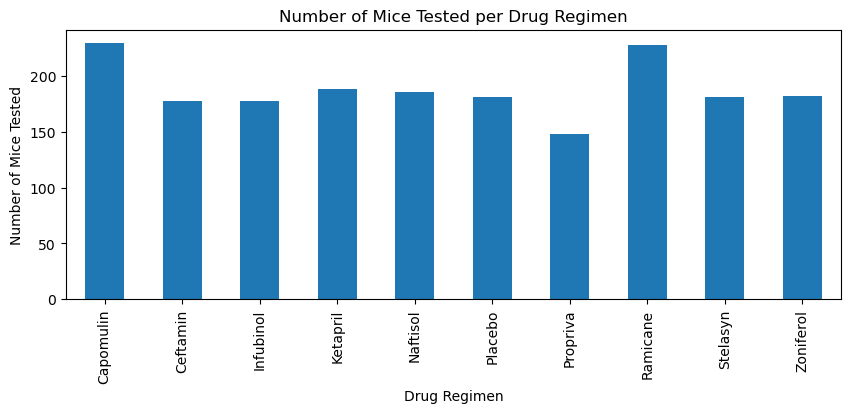

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_groups = clean_mice.groupby('Drug Regimen')
mouse_drug_count = mouse_groups['Mouse ID'].count()
mouse_chart = mouse_drug_count.plot(kind='bar', figsize=(10,3.5))
plt.title('Number of Mice Tested per Drug Regimen')
plt.ylabel('Number of Mice Tested')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Placebo'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

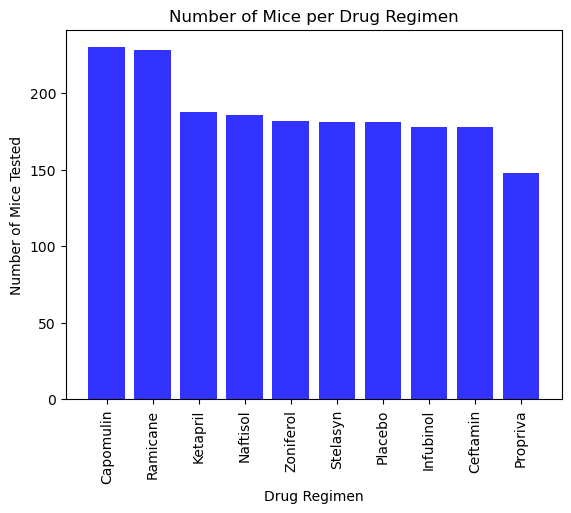

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mouse_per_drug = clean_mice['Drug Regimen'].value_counts()
x = mouse_per_drug.index
y = mouse_per_drug

plt.bar(x,y, color = 'b', alpha = .8, align = 'center')
plt.title('Number of Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation = 'vertical')

Text(0.5, 1.0, 'Mouse Sex')

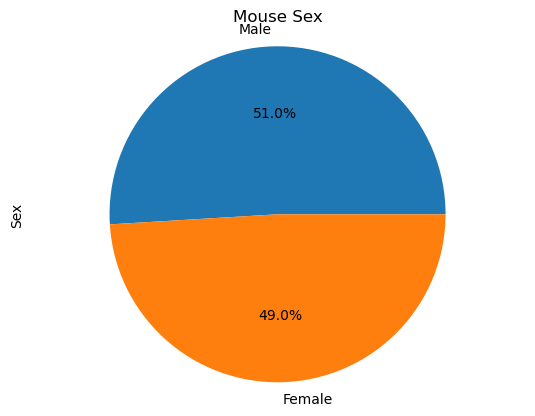

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = clean_mice['Sex'].value_counts()
mouse_pie = mouse_sex.plot(kind = 'pie', autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Mouse Sex')

Text(0.5, 1.0, 'Mouse Sex')

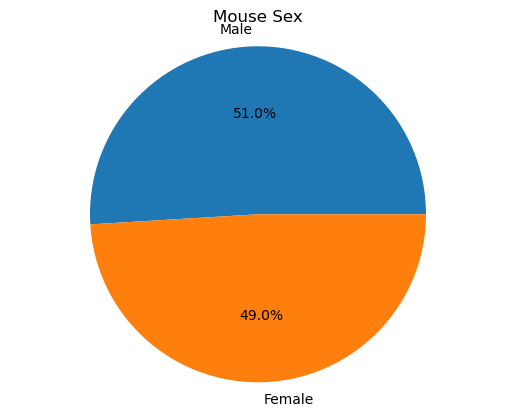

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex, labels = ['Male', 'Female'], autopct= '%1.1f%%')
plt.axis('equal')
plt.title('Mouse Sex')


## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_drug = clean_mice.loc[clean_mice['Drug Regimen'] == 'Capomulin',:]
ramicane_drug = clean_mice.loc[clean_mice['Drug Regimen'] == 'Ramicane',:]
infubinol_drug = clean_mice.loc[clean_mice['Drug Regimen'] == 'Infubinol',:]
ceftamin_drug = clean_mice.loc[clean_mice['Drug Regimen'] == 'Ceftamin',:]

# Start by getting the last (greatest) timepoint for each mouse
greatest_capo = capomulin_drug.groupby('Mouse ID').max()['Timepoint']
greatest_rami = ramicane_drug.groupby('Mouse ID').max()['Timepoint']
greatest_infu = infubinol_drug.groupby('Mouse ID').max()['Timepoint']
greatest_ceft = ceftamin_drug.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_capo_df = pd.DataFrame(greatest_capo)
greatest_rami_df = pd.DataFrame(greatest_rami)
greatest_infu_df = pd.DataFrame(greatest_infu)
greatest_ceft_df = pd.DataFrame(greatest_ceft)

capo_merge = pd.merge(greatest_capo_df, clean_mice, how= 'left', on= ('Mouse ID', 'Timepoint'))
rami_merge = pd.merge(greatest_rami_df, clean_mice, how= 'left', on = ('Mouse ID', 'Timepoint'))
infu_merge = pd.merge(greatest_infu_df, clean_mice, how= 'left', on = ('Mouse ID', 'Timepoint'))
ceft_merge = pd.merge(greatest_ceft_df, clean_mice, how= 'left', on = ('Mouse ID', 'Timepoint'))


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume = 0
timepoint = clean_mice.groupby(['Drug Regimen', 'Mouse ID']).agg(tumor_volume = ('Tumor Volume (mm3)', lambda x: x.iloc[-1]))  
timepoint = timepoint.stack(level = 0).unstack(level = 0) 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    quartiles = timepoint[drug].quantile([.25, .5, .75]).round(2)
    lowerq = quartiles[.25].round(2)
    upperq = quartiles[.75].round(2)
    iqr = round(upperq - lowerq)
    lower_bound = round(lowerq - (1.5 * iqr),2)
    upper_bound = round(upperq + (1.5 * iqr))

    if tumor_volume == 0:
        print(f'The IQR of {drug} treatments is {iqr}')
        print(f'Values below {lower_bound} could be {drug} outliers')
        print(f'Values above {upper_bound} could {drug} outliers')





    
    # Locate the rows which contain mice on each drug and get the tumor volumes

 
    

The IQR of Capomulin treatments is 8
Values below 20.38 could be Capomulin outliers
Values above 52 could Capomulin outliers
The IQR of Ramicane treatments is 9
Values below 18.06 could be Ramicane outliers
Values above 54 could Ramicane outliers
The IQR of Infubinol treatments is 11
Values below 37.55 could be Infubinol outliers
Values above 82 could Infubinol outliers
The IQR of Ceftamin treatments is 16
Values below 24.72 could be Ceftamin outliers
Values above 88 could Ceftamin outliers


Text(0.5, 1.0, 'Tumor Volume by Drug Regimen')

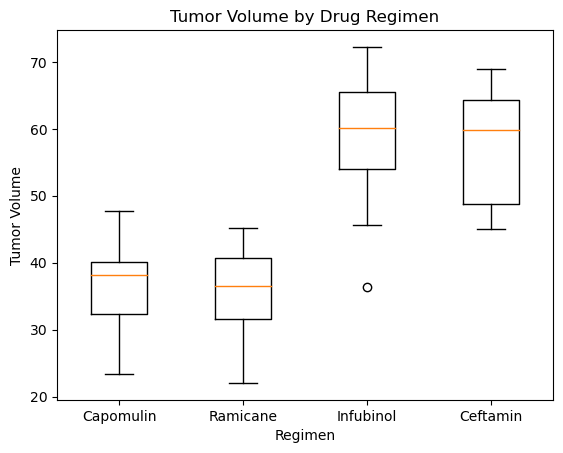

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(timepoint[drug].dropna()))
plt.boxplot(boxplot_list, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.xlabel('Regimen')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume by Drug Regimen')


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse m601')

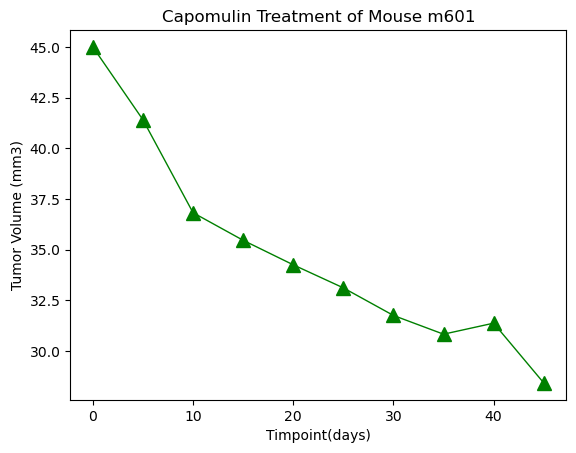

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_line = capomulin_drug.loc[capomulin_drug['Mouse ID']=='m601']
xt_axis = mouse_line['Timepoint']
y_axis = mouse_line['Tumor Volume (mm3)']
plt.plot(xt_axis, y_axis, linewidth = 1, markersize = 10, marker = '^', color = 'g')
plt.xlabel('Timpoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse m601')

C:\Users\micha\AppData\Local\Temp\ipykernel_36272\659939521.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capo_volume = capomulin_drug.groupby('Mouse ID').mean()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

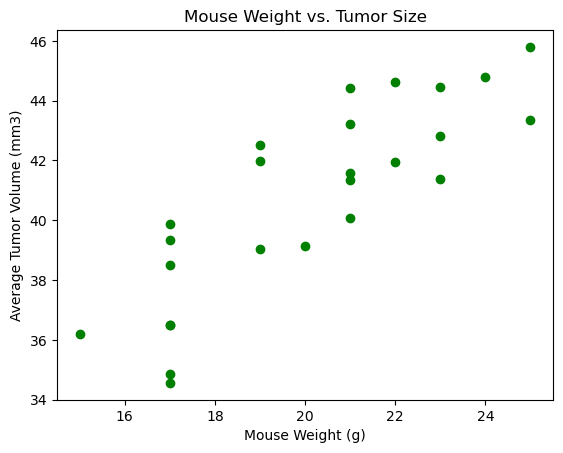

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capo_volume = capomulin_drug.groupby('Mouse ID').mean()
plt.scatter(avg_capo_volume['Weight (g)'], avg_capo_volume['Tumor Volume (mm3)'], color = 'g')
plt.title('Mouse Weight vs. Tumor Size')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

The correlation between mouse weight and average tumor size is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

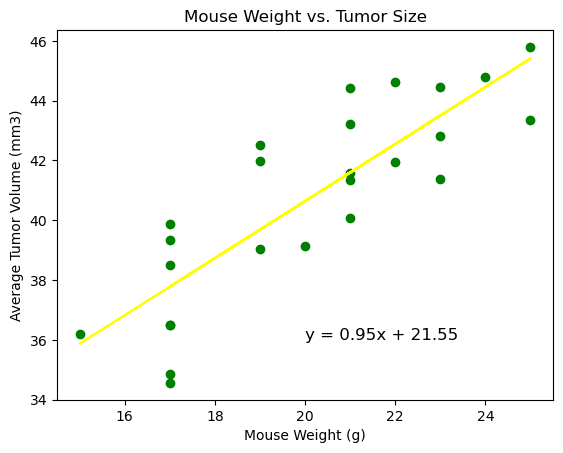

In [20]:
# Calculate the correlation coefficient and linear regression model 
corr = st.pearsonr(avg_capo_volume['Weight (g)'], avg_capo_volume['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and average tumor size is {round(corr[0], 2)}')
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_capo_volume['Weight (g)'], avg_capo_volume['Tumor Volume (mm3)'])
regress = avg_capo_volume['Weight (g)'] * slope + intercept
line = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.scatter(avg_capo_volume['Weight (g)'], avg_capo_volume['Tumor Volume (mm3)'], color = 'g')
plt.plot(avg_capo_volume['Weight (g)'], regress, color = 'yellow')
plt.annotate(line, (20,36), fontsize = 12)
plt.title('Mouse Weight vs. Tumor Size')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


